## 01 - Airline Core Analysis
### <strong>Objective: </strong>
<p>The objective of this notebook is to perform data analysis on previously cleaned datasets (cleaned_Flight.csv, cleaned_Tickets.csv, and cleaned_Airport_Codes.csv) and provide recommendations for potential routes, breakeven points, and other key performance indicators (KPIs) to management. </p>

### <strong>Methodology: </strong>
<p>
    1. Read in provided CSV files (Flight.csv, Tickets.csv and Airport_Codes.csv);<br>
    2. Perform the following core analysis; <br>
        &nbsp;&nbsp;&nbsp;&nbsp; 2.1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter; <br>
        &nbsp;&nbsp;&nbsp;&nbsp; 2.2. The 10 most profitable round trip routes; <br>
        &nbsp;&nbsp;&nbsp;&nbsp; 2.3. The 5 round trips recommended to invest in; <br>
        &nbsp;&nbsp;&nbsp;&nbsp; 2.4. The number of round trips flights to breakeven on the upfront airplane cost; <br>
        &nbsp;&nbsp;&nbsp;&nbsp; 2.5. Other recommended KPIs - experimental analysis; <br>

<strong> Please note that as the entire analysis takes approximately 35 minutes to complete, the code saves intermediate results in the "intermediate_results" folders for your convenience.</strong>
</p>

### <strong>Helper Functions: </strong>
<p>Helper functions are small, reusable functions that are designed to perform specific tasks within this analysis. <br>
        &nbsp;&nbsp;&nbsp;&nbsp; "helper_revenue_calculator.py" - to calculate revenue of each route.<br>
        &nbsp;&nbsp;&nbsp;&nbsp; "helper_cost_calculator.py" - to calculate cost of each route; <br>
        &nbsp;&nbsp;&nbsp;&nbsp; "helper_reound_trip_finder.py" - to find all round trips and count their frequency; <br>
</p>

### <strong>Key Assumptions: </strong>
<p>The following assumptions are made in this analysis. <br>
        &nbsp;&nbsp;&nbsp;&nbsp; <b> Market Demand and Competitive Landscape: </b> We should pick routes with sizeable demand with moderate competition to ensure future growth and to avoid market saturation<br>
        &nbsp;&nbsp;&nbsp;&nbsp; <b> Profit Maximization: </b> The total profit is correlated with the number of round trips. Hence, we used profit per trip as one of the key measurements.<br>
        &nbsp;&nbsp;&nbsp;&nbsp; <b> Achievability of Breakeven: </b> We assume more trips would impose potential risks such as delay/cancellation/safety, so we targeted the least number of trips needed to breakeven on the initial investment.<br>
For more details, please see section 2.3, 2.4, and 2.5.
</p>

### <strong>Results / Deliverables: </strong>
| # | Description | File Name |
|-----------------|-----------------|-----------------|
| 1 | 10 Busiest Routes | 1_Top_10_Busiest.csv |
| 2 | 10 Most Profitable Routes | 2_Top_10_Most_Profit_Routes.csv |
| 3 | 5 Recommended Routes to Invest | 3_Top_5_joined_profits_and_trips_recommended.csv |
| 4 | 5 Recommended Routes to Invest with Breakeven | 4_Top_5_joined_profits_and_trips_recommended_with_BE.csv |
| 5 | Recommended KPIs | See Section 2.5 |

#### <strong>1. Import libraries and helper functions</strong>

In [1]:
#import necessary libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as stats

In [2]:
#import all helper functions
from helper_round_trip_finder import *
from helper_revenue_calculator import *
from helper_cost_calculator import *
#from helper_profit_calculator_experimental import *

In [3]:
clean_flights_df = pd.read_csv('/Users/yuchengliu/Desktop/c1 data challenge/data_cleaned/cleaned_Flights.csv')
clean_airport_code_df = pd.read_csv('/Users/yuchengliu/Desktop/c1 data challenge/data_cleaned/cleaned_Airport_Codes.csv')
print("Imports loaded successfully!")

/tmp/ipykernel_26560/489310837.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_flights_df = pd.read_csv('/Users/yuchengliu/Desktop/c1 data challenge/data_cleaned/cleaned_Flights.csv')


Imports loaded successfully!


#### 2.1. The 10 busiest round rtip routes in terms of number of round trip flights in the quarter;
<p>
    Here we call the helper function find_number_of_round_trips to calculate all round trips.
</p>

In [4]:
df_all_round_trips = find_number_of_round_trips('/Users/yuchengliu/Desktop/c1 data challenge/data_cleaned/cleaned_Flights.csv')

analysis_result_1_top_10_busiest_round_trips = df_all_round_trips[1::2].head(10).reset_index(drop = True)

#print the 10 busiest round trips
analysis_result_1_top_10_busiest_round_trips

/Users/yuchengliu/Desktop/c1 data challenge/helper_round_trip_finder.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_flights = pd.read_csv(input_path)


,ORIGIN,DESTINATION,count,reverse_count,round_trips,ROUTE
0,SFO,LAX,4175,4158,4158,SFO-LAX
1,LGA,ORD,3571,3575,3571,LGA-ORD
2,LAS,LAX,3252,3254,3252,LAS-LAX
3,JFK,LAX,3140,3159,3140,JFK-LAX
4,LAX,SEA,2498,2494,2494,LAX-SEA
5,BOS,LGA,2402,2414,2402,BOS-LGA
6,HNL,OGG,2398,2395,2395,HNL-OGG
7,PDX,SEA,2396,2375,2375,PDX-SEA
8,MCO,ATL,2351,2356,2351,MCO-ATL
9,LGA,ATL,2292,2297,2292,LGA-ATL


<p>
For better visualization, we create a bar chart for the 10 busiest round trips.
</p>

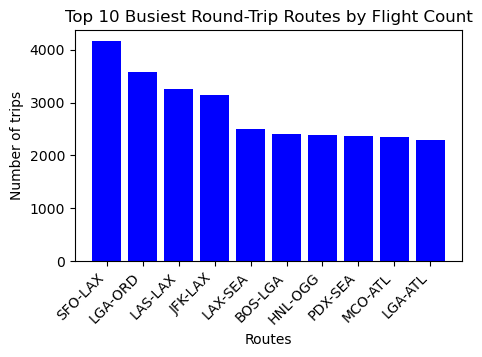

In [5]:
# Create a bar plot
plt.figure(figsize=(5, 3))
plt.bar(analysis_result_1_top_10_busiest_round_trips['ROUTE'], analysis_result_1_top_10_busiest_round_trips['round_trips'], color='blue')
plt.xlabel('Routes')
plt.ylabel('Number of trips')
plt.title('Top 10 Busiest Round-Trip Routes by Flight Count')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

<p>
Save all round trips to the intermediate folder for future reference, and save <i>analysis_result_1_top_10_busiest_round_trips</i> to output folder as one of the deliverables.
</p>

In [6]:
df_all_round_trips.to_csv('/Users/yuchengliu/Desktop/c1 data challenge/intermediate_results/all_round_trips.csv', index=False)
analysis_result_1_top_10_busiest_round_trips.to_csv('/Users/yuchengliu/Desktop/c1 data challenge/outputs/1_Top_10_Busiest.csv', index=False)

#### 2.2. The 10 most profitable round trip routes;
<p>
    Here we use a functions (find_most_profitable_round_trips) to call three helper functions - total_cost_calculator, and revenue_calculator, and check_average_ticket_price to calculate the total revenue, cost, and profit of each round trip.
</p>

In [7]:
def find_most_profitable_round_trips(origin, destination, clean_flights_df, clean_airport_code_df, loop_limit):
    #import two clean datasets
    clean_flights_df = clean_flights_df
    clean_airport_code_df = clean_airport_code_df

    #start to build the round trip. To make the loop run faster, we use loop_limit to stop unncesscary check. 
    filtered_flights_origin_df = clean_flights_df.loc[(clean_flights_df['ORIGIN'] == origin) & (clean_flights_df['DESTINATION'] == destination)].head(loop_limit)
    filtered_flights_destination_df = clean_flights_df.loc[(clean_flights_df['ORIGIN'] == destination) & (clean_flights_df['DESTINATION'] == origin)].head(loop_limit)
    combined_flights_df = pd.concat([filtered_flights_origin_df,filtered_flights_destination_df])

    airport_codes_and_type_df = clean_airport_code_df[['TYPE','IATA_CODE']]

    if not combined_flights_df.empty:
        
        combined_flight_with_airport_type = pd.merge(combined_flights_df, airport_codes_and_type_df, left_on='ORIGIN', right_on='IATA_CODE', how='left')
        combined_flight_with_airport_type = pd.merge(combined_flight_with_airport_type, airport_codes_and_type_df, left_on='DESTINATION', right_on='IATA_CODE', how='left', suffixes=('_origin','_destination'))
        combined_flight_with_airport_type['ROUTE'] = combined_flight_with_airport_type.apply(lambda row: '-'.join(sorted([row['ORIGIN'], row['DESTINATION']])), axis=1)
        merged_flight_data = combined_flight_with_airport_type[['ROUTE','ORIGIN', 'TYPE_origin', 'DESTINATION', 'TYPE_destination', 'DISTANCE','OCCUPANCY_RATE','DEP_DELAY','ARR_DELAY']]

    #Revenue - find average ITIN prices
    avg_ticket_price = check_average_ticket_price(origin, destination)
    if avg_ticket_price is None:
        avg_ticket_price = 0

    #create a list for each route
    profit_list = []
    
    for index, row in merged_flight_data.iterrows():
        route = row['ROUTE']
        
        #COST Elements
        type_origin = row['TYPE_origin']
        type_dest = row['TYPE_destination']
        distance = row['DISTANCE']
        dep_delay = float(row['DEP_DELAY'])
        arr_delay = float(row['ARR_DELAY'])
        fuel_and_other_cost = 8 + 1.18

        #REVENUE Elements
        occupancy_rate = row['OCCUPANCY_RATE']

        #call total_cost_calculator to calculate the cost
        cost = total_cost_calculator(dep_delay, arr_delay, distance, type_origin, type_dest, fuel_and_other_cost)

        #call revenue_calculator to calculate the revenue
        revenue = revenue_calculator(occupancy_rate, avg_ticket_price)

        #start to build up the cost and revenues for the route
        if len(profit_list) > 0 and cost is not None and revenue is not None and pd.notna(cost) and pd.notna(revenue):
            profit = round(revenue - cost)
            profit_list[0]['COST'] += cost
            profit_list[0]['REVENUE'] += revenue
            profit_list[0]['PROFIT'] += profit
        
        elif cost is not None and revenue is not None and pd.notna(cost) and pd.notna(revenue):
            profit = round(revenue - cost)
            new_entry = {'ROUTE':route,'COST':cost,'REVENUE':revenue,'PROFIT':profit}
                    #print(new_entry)
            profit_list.append(new_entry)

    #convert the profit list to df
    merged_flight_costs_revenue = pd.DataFrame(profit_list, columns=['ROUTE', 'COST', 'REVENUE','PROFIT'])
    return merged_flight_costs_revenue

<p>
    We iterate the entire all round trips dataframe to find profit for each trip. Result is saved in all_most_profit_result.
</p>

In [8]:
all_most_profit_result = pd.DataFrame()

#Main loop to find accumulated profit for each route
#this code block takes 30 mins to complete
for index, row in df_all_round_trips[1::2].iterrows():
    each_profit_df = find_most_profitable_round_trips(row['ORIGIN'],row['DESTINATION'], clean_flights_df, clean_airport_code_df, row[['count', 'reverse_count']].max())
    all_most_profit_result = pd.concat([all_most_profit_result, each_profit_df], ignore_index=True)

/tmp/ipykernel_26560/3053958360.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_most_profit_result = pd.concat([all_most_profit_result, each_profit_df], ignore_index=True)
/Users/yuchengliu/Desktop/c1 data challenge/helper_revenue_calculator.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_tickets_df['ROUTE'] = filtered_tickets_df.apply(lambda row: '-'.join(sorted([row['ORIGIN'], row['DESTINATION']])), axis=1)
/tmp/ipykernel_26560/3053958360.py:7: FutureWarning: The behavior of Da

<p>
Here is the result of the top 10 most profitable routes.
</p>

In [9]:
all_most_profit_result = all_most_profit_result.sort_values(by=['PROFIT'], ascending=False)
all_profits_by_route = all_most_profit_result.drop_duplicates(subset=['ROUTE'])
all_profits_by_route.reset_index(drop = True)

top_10_most_profitable_routes = all_profits_by_route.head(10)
top_10_most_profitable_routes

,ROUTE,COST,REVENUE,PROFIT
1234,CLT-FLO,8.466395e+06,1.329707e+08,124504230
254,CLT-GSP,3.355213e+07,1.514043e+08,117852148
280,CLT-GSO,3.221318e+07,1.395986e+08,107385309
291,CLT-ILM,2.552411e+07,1.150233e+08,89499651
242,CHS-CLT,3.523955e+07,1.225147e+08,87275131
758,MDT-PHL,1.331847e+07,9.729808e+07,83979706
336,CLT-MYR,2.322334e+07,1.055475e+08,82324202
471,AVL-CLT,2.442360e+07,9.822352e+07,73800340
1195,SLC-TWF,1.044582e+07,8.189150e+07,71445687
436,CLT-ROA,2.654411e+07,9.444449e+07,67900374


<p>
For better visualization, we create a bar chart for the top 10 most profitable round trips.
</p>

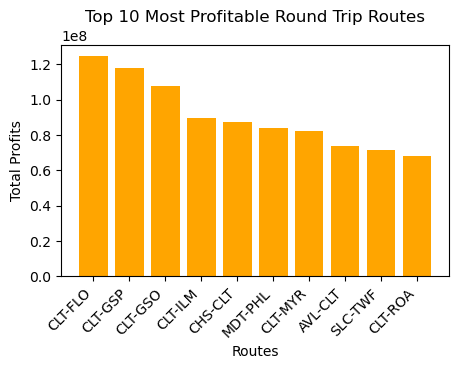

In [10]:
# Create a bar plot
plt.figure(figsize=(5, 3))
plt.bar(top_10_most_profitable_routes['ROUTE'], top_10_most_profitable_routes['PROFIT'], color='orange')
plt.xlabel('Routes')
plt.ylabel('Total Profits')
plt.title('Top 10 Most Profitable Round Trip Routes')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

<p>
Save all profits data frame to the intermediate folder for future reference, and save <i>2_Top_10_Most_Profit_Routes</i> to output folder as one of the deliverables.
</p>

In [11]:
all_profits_by_route.to_csv('/Users/yuchengliu/Desktop/c1 data challenge/intermediate_results/all_profits_by_route.csv', index = False)
top_10_most_profitable_routes.to_csv('/Users/yuchengliu/Desktop/c1 data challenge/outputs/2_Top_10_Most_Profit_Routes.csv', index = False)

#### 2.3. The 5 round trips recommended to invest in; <br>
<p>
    To recommending the top 5 routes for investment, we start with merging the profits data with the round trips data. This allows us to identify any outliers and calculate the profit per round trip for in-depth analysis.
</p>

<p>
    Let us join the two dataframes and calculate profit_per_trip.
</p>

In [12]:
df_all_round_trips_light = df_all_round_trips[['round_trips', 'ROUTE']]
df_joined_profits_and_trips = pd.merge(all_profits_by_route, df_all_round_trips_light, left_on='ROUTE', right_on='ROUTE', how='left')
df_joined_profits_and_trips = df_joined_profits_and_trips[df_joined_profits_and_trips['round_trips'] != 0]
df_joined_profits_and_trips['profit_per_trip'] = df_joined_profits_and_trips.apply(lambda x: x['PROFIT'] / x['round_trips'], axis=1)

#save the result to intermediate folder
df_joined_profits_and_trips.to_csv('/Users/yuchengliu/Desktop/c1 data challenge/intermediate_results/all_joined_profits_and_trips.csv', index = False)

df_joined_profits_and_trips.head(10)

,ROUTE,COST,REVENUE,PROFIT,round_trips,profit_per_trip
0,CLT-FLO,8.466395e+06,1.329707e+08,124504230,251.0,496032.788845
1,CLT-GSP,3.355213e+07,1.514043e+08,117852148,772.0,152658.222798
2,CLT-GSO,3.221318e+07,1.395986e+08,107385309,743.0,144529.352624
3,CLT-ILM,2.552411e+07,1.150233e+08,89499651,732.0,122267.282787
4,CHS-CLT,3.523955e+07,1.225147e+08,87275131,784.0,111320.320153
5,MDT-PHL,1.331847e+07,9.729808e+07,83979706,396.0,212069.964646
6,CLT-MYR,2.322334e+07,1.055475e+08,82324202,677.0,121601.480059
7,AVL-CLT,2.442360e+07,9.822352e+07,73800340,559.0,132022.075134
8,SLC-TWF,1.044582e+07,8.189150e+07,71445687,256.0,279084.714844
9,CLT-ROA,2.654411e+07,9.444449e+07,67900374,591.0,114890.649746


<p>
We define a helper function named find_mean_std_and_draw to visualize data distribution and determine the mean and standard deviation.
</p>

In [13]:
def find_mean_std_and_draw(input_df, input_column):
    mean = np.mean(input_df[input_column])
    std = np.std(input_df[input_column])
    
    # Calculating probability density function (PDF)
    pdf = stats.norm.pdf(input_df[input_column].sort_values(), mean, std)
    
    # Drawing a graph
    plt.figure(figsize=(5, 3))
    plt.title(input_column)
    plt.plot(input_df[input_column].sort_values(), pdf)
    plt.xlabel(input_column, size = 12)
    plt.ylabel("Probability Density (Likelihood)", size = 12)    
    plt.grid(True, alpha = 0.3, linestyle="--")
    plt.show()

    print("Mean = ", round(mean, 5))
    print("Standard Deviation = ", round(std, 5))

    return round(mean, 5), round(std, 5)

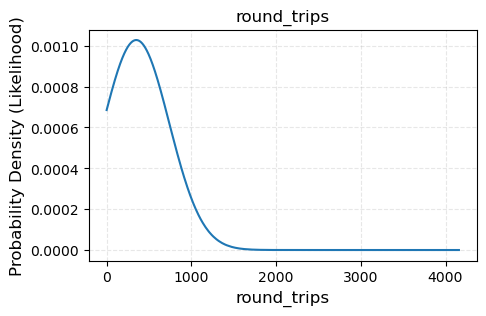

Mean =  350.53416
Standard Deviation =  388.06144


In [14]:
round_trip_mean, round_trip_std = find_mean_std_and_draw(df_joined_profits_and_trips, 'round_trips')

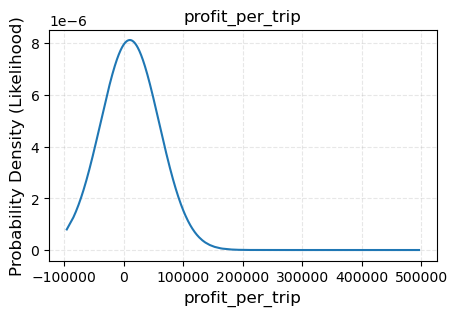

Mean =  10221.06754
Standard Deviation =  49144.71127


In [15]:
profit_per_trip_mean, profit_per_trip_std = find_mean_std_and_draw(df_joined_profits_and_trips, 'profit_per_trip')

<p>
    To make recommendation, we make the following key assumptions -  
</p>

| # | Assumption | Justification |
|-----------------|-----------------|-----------------|
| 1 | Market Demand and Competitive Landscape | We prioritize routes with substantial demand, gauged by the number of round trips, <br>and moderate competition to foster growth and prevent saturation. We selected routes <br>with trip numbers within one to two standard deviations from the mean <br>(mean = 350.53416, std = 388.06144).
| 2 | Profit Maximization | We prioritize profit by considering profit per trip rather than total profit since it correlates <br> with the number of round trips. Profit per trip is uncapped and must only be positive to <br>explore all potential profit avenues.
| 3 | Achievability of Breakeven | We sorted the final results based on the highest profit per trip to minimize the trips required <br> to break even on the initial investment. We prioritize fewer trips to mitigate potential risks <br> such as delays, cancellations, and safety concerns.





In [16]:
df_joined_profits_and_trips_recommended = df_joined_profits_and_trips[(df_joined_profits_and_trips['round_trips'] >= round_trip_mean)
                                                                    & (df_joined_profits_and_trips['round_trips'] <= round_trip_mean + (2 * round_trip_std))
                                                                    & (df_joined_profits_and_trips['profit_per_trip'] >= 0)]
df_joined_profits_and_trips_recommended = df_joined_profits_and_trips_recommended.sort_values(by=['profit_per_trip'], ascending=False)
all_joined_profits_and_trips_recommended = df_joined_profits_and_trips_recommended.reset_index(drop = True)

#300 routes returned 
all_joined_profits_and_trips_recommended

,ROUTE,COST,REVENUE,PROFIT,round_trips,profit_per_trip
0,MDT-PHL,1.331847e+07,9.729808e+07,83979706,396.0,212069.964646
1,CLT-GSP,3.355213e+07,1.514043e+08,117852148,772.0,152658.222798
2,CLT-GSO,3.221318e+07,1.395986e+08,107385309,743.0,144529.352624
3,CLT-TRI,1.848058e+07,7.491816e+07,56437717,423.0,133422.498818
4,AVL-CLT,2.442360e+07,9.822352e+07,73800340,559.0,132022.075134
...,...,...,...,...,...,...
295,CHS-DCA,2.629077e+07,2.666075e+07,370002,511.0,724.074364
296,ATL-RIC,5.120621e+07,5.186216e+07,655938,1027.0,638.693281
297,DEN-SMF,4.136120e+07,4.171988e+07,358136,702.0,510.165242
298,BTV-JFK,1.842819e+07,1.852911e+07,100916,455.0,221.793407


<p>
Here is the result of the top 5 recommended routes to invest in.
</p>

In [17]:
top_5_joined_profits_and_trips_recommended = all_joined_profits_and_trips_recommended.head(5)

top_5_joined_profits_and_trips_recommended

,ROUTE,COST,REVENUE,PROFIT,round_trips,profit_per_trip
0,MDT-PHL,1.331847e+07,97298080.0,83979706,396.0,212069.964646
1,CLT-GSP,3.355213e+07,151404263.4,117852148,772.0,152658.222798
2,CLT-GSO,3.221318e+07,139598578.0,107385309,743.0,144529.352624
3,CLT-TRI,1.848058e+07,74918157.5,56437717,423.0,133422.498818
4,AVL-CLT,2.442360e+07,98223520.0,73800340,559.0,132022.075134


<p>
Save all recommended data to the intermediate folder for future reference, and save <i>3_top_10_most_profitable_routes</i> to output folder as one of the deliverables.
</p>

In [18]:
all_joined_profits_and_trips_recommended.to_csv('/Users/yuchengliu/Desktop/c1 data challenge/intermediate_results/all_joined_profits_and_trips_recommended.csv', index = False)
top_5_joined_profits_and_trips_recommended.to_csv('/Users/yuchengliu/Desktop/c1 data challenge/outputs/3_Top_5_joined_profits_and_trips_recommended.csv', index = False)

#### 2.4. The number of round trips flights to breakeven on the upfront airplane cost;<br>
<p>
    We used the initial investment of $90 millions and divided it by the profit per trip to calculate the number of trips needed to break even.
</p>

In [19]:
initial_investment = 90000000

top_5_joined_profits_and_trips_recommended['# of breakeven trips'] = top_5_joined_profits_and_trips_recommended.apply(lambda x: initial_investment/ x['profit_per_trip'], axis=1)

top_5_joined_profits_and_trips_recommended

/tmp/ipykernel_26560/1619927080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_joined_profits_and_trips_recommended['# of breakeven trips'] = top_5_joined_profits_and_trips_recommended.apply(lambda x: initial_investment/ x['profit_per_trip'], axis=1)


,ROUTE,COST,REVENUE,PROFIT,round_trips,profit_per_trip,# of breakeven trips
0,MDT-PHL,1.331847e+07,97298080.0,83979706,396.0,212069.964646,424.388244
1,CLT-GSP,3.355213e+07,151404263.4,117852148,772.0,152658.222798,589.552258
2,CLT-GSO,3.221318e+07,139598578.0,107385309,743.0,144529.352624,622.710878
3,CLT-TRI,1.848058e+07,74918157.5,56437717,423.0,133422.498818,674.548901
4,AVL-CLT,2.442360e+07,98223520.0,73800340,559.0,132022.075134,681.704176


In [20]:
top_5_joined_profits_and_trips_recommended.to_csv('/Users/yuchengliu/Desktop/c1 data challenge/outputs/4_Top_5_joined_profits_and_trips_recommended_with_BE.csv', index = False)

#### 2.5. Other KPIs<br>

##### KPIs that we should consider - 
| # | KPIs | Justification |
|-----------------|-----------------|-----------------|
| 1 | Delay Time (Departure)* | The delay time has significant impact on profit and can be considered controllable<br> to some extent (e.g. Operational Efficiency, Crew Managment). |
| 2 | Delay Time (Arrival)* | The delay time has significant impact on profit and can be considered controllable<br> to some extent (e.g. Operational Efficiency, Crew Managment). |
| 3 | Occupancy* | The occupancy also has significant impact on profit and can be improved<br> by promotion / marketing. |

<p>
    *All KPIs backed by our data analysis. Please see below.
</p>
<br>

##### KPIs that we should consider but data is not available - 

| # | KPIs (No Data Available) | Justification |
|-----------------|-----------------|-----------------|
| 1 | Customer Rating | High satisfaction levels contribute to customer loyalty and repeat business. <br>This may drive up the occupancy. |
| 2 | Safety Rating | High safety ratings reassure passengers that the airline prioritizes their safety. <br>High rating may also drive up the occupancy. |


<br>

##### Factors that we cannot control - 

| # | Factors (Not Consider) | Justification |
|-----------------|-----------------|-----------------|
| 1 | Fuel Price / Depreciation | Fuel and depreciation remain largely outside of control due to market dynamics and industry competitiveness. |
| 2 | Airport Cost | Airport location plays a critical role in customer satisfaction, including travel convenience, accessibility, <br>and connectivity. Major or large airports have incomparable advantages compared to smaller airports.|

<p>
    To comprehend the impact of delay time and occupancy rate on profit, we first need to understand the data distribution. Let's utilize our helper function (find_mean_std_and_draw) to visualize the three columns in the original clean_flights_df dataframe. This will allow us to quickly determine their means, standard deviation, and distribution.
</p>

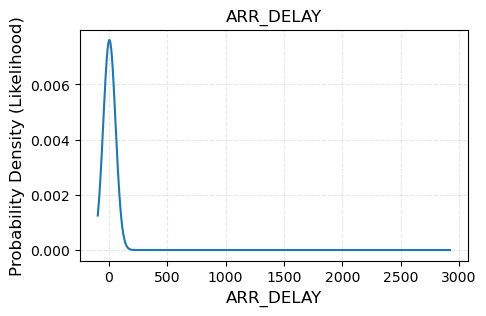

Mean =  5.65162
Standard Deviation =  52.42201
Median =  -6.0


In [21]:
mean_ARR_DELAY, std_ARR_DELAY = find_mean_std_and_draw(clean_flights_df, 'ARR_DELAY')
median_ARR_DELAY = clean_flights_df['ARR_DELAY'].median()
print("Median = ", median_ARR_DELAY)

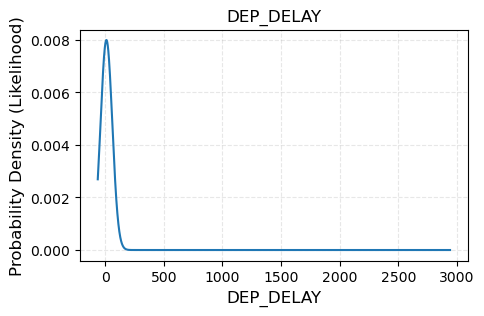

Mean =  10.72842
Standard Deviation =  49.97025
Median =  -2.0


In [22]:
mean_DEP_DELAY, std_DEP_DELAY = find_mean_std_and_draw(clean_flights_df, 'DEP_DELAY')
median_DEP_DELAY = clean_flights_df['DEP_DELAY'].median()
print("Median = ", median_DEP_DELAY)

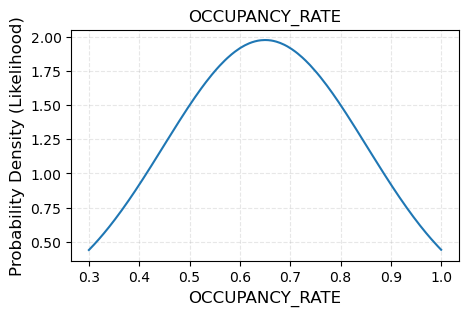

Mean =  0.65022
Standard Deviation =  0.20201


In [23]:
mean_OCCUPANCY_RATE, std_OCCUPANCY_RATE = find_mean_std_and_draw(clean_flights_df, 'OCCUPANCY_RATE')

<p>
To facilitate a direct comparison between the current profit and profits with customized delay time and occupancy rate, we have developed this function (find_most_profitable_round_trips_experimental), which closely resembles the find_most_profitable_round_trips function used in the main code. This experimental function allows for a few customized and direct input parameters.
</p>    


In [24]:
def find_most_profitable_round_trips_experimental(origin, 
                                                  destination, 
                                                  clean_flights_df, 
                                                  clean_airport_code_df, 
                                                  loop_limit,
                                                  dep_delay,
                                                  arr_delay,
                                                  occupancy_rate,
                                                  fuel_and_other_cost):
    clean_flights_df = clean_flights_df
    clean_airport_code_df = clean_airport_code_df

    filtered_flights_origin_df = clean_flights_df.loc[(clean_flights_df['ORIGIN'] == origin) & (clean_flights_df['DESTINATION'] == destination)].head(loop_limit)
    filtered_flights_destination_df = clean_flights_df.loc[(clean_flights_df['ORIGIN'] == destination) & (clean_flights_df['DESTINATION'] == origin)].head(loop_limit)
    combined_flights_df = pd.concat([filtered_flights_origin_df,filtered_flights_destination_df])

    airport_codes_and_type_df = clean_airport_code_df[['TYPE','IATA_CODE']]

    if not combined_flights_df.empty:
        
        combined_flight_with_airport_type = pd.merge(combined_flights_df, airport_codes_and_type_df, left_on='ORIGIN', right_on='IATA_CODE', how='left')
        combined_flight_with_airport_type = pd.merge(combined_flight_with_airport_type, airport_codes_and_type_df, left_on='DESTINATION', right_on='IATA_CODE', how='left', suffixes=('_origin','_destination'))
        combined_flight_with_airport_type['ROUTE'] = combined_flight_with_airport_type.apply(lambda row: '-'.join(sorted([row['ORIGIN'], row['DESTINATION']])), axis=1)
        merged_flight_data = combined_flight_with_airport_type[['ROUTE','ORIGIN', 'TYPE_origin', 'DESTINATION', 'TYPE_destination', 'DISTANCE','OCCUPANCY_RATE','DEP_DELAY','ARR_DELAY']]
        
    avg_ticket_price = check_average_ticket_price(origin, destination)
    if avg_ticket_price is None:
        avg_ticket_price = 0
        
    profit_list = []
    
    for index, row in merged_flight_data.iterrows():
        route = row['ROUTE']
        type_origin = row['TYPE_origin']
        type_dest = row['TYPE_destination']
        distance = row['DISTANCE']
        occupancy_rate = occupancy_rate
    
        dep_delay = dep_delay
        arr_delay = arr_delay
        fuel_and_other_cost = fuel_and_other_cost
        
        cost = total_cost_calculator(dep_delay, arr_delay, distance, type_origin, type_dest, fuel_and_other_cost)
        revenue = revenue_calculator(occupancy_rate, avg_ticket_price)
        
        if len(profit_list) > 0 and cost is not None and revenue is not None and pd.notna(cost) and pd.notna(revenue):
            profit = round(revenue - cost)
            profit_list[0]['COST'] += cost
            profit_list[0]['REVENUE'] += revenue
            profit_list[0]['PROFIT'] += profit
        
        elif cost is not None and revenue is not None and pd.notna(cost) and pd.notna(revenue):
            profit = round(revenue - cost)
            new_entry = {'ROUTE':route,'COST':cost,'REVENUE':revenue,'PROFIT':profit}
                    #print(new_entry)
            profit_list.append(new_entry)
    
    merged_flight_costs_revenue = pd.DataFrame(profit_list, columns=['ROUTE', 'COST', 'REVENUE','PROFIT'])
    return merged_flight_costs_revenue

<p>
    With the current delay time and occupancy, the route COS-MCO is barely profitable. However, if we ensure the delay is at the mean value and with some promotion, we manage to increase the occupancy rate to the mean plus half of the standard deviation. This route yields an incredible amount of profit.
</p>

In [25]:
find_most_profitable_round_trips("COS", "MCO", clean_flights_df, clean_airport_code_df, 1000)

,ROUTE,COST,REVENUE,PROFIT
0,COS-MCO,3436556.4,3441555.0,5001


In [26]:
customized_dep_delay = mean_DEP_DELAY
customized_arr_delay = mean_ARR_DELAY
customized_occ =  mean_OCCUPANCY_RATE + (std_OCCUPANCY_RATE * 0.5)

find_most_profitable_round_trips_experimental("COS", "MCO", clean_flights_df, clean_airport_code_df, 1000, customized_dep_delay, customized_arr_delay, customized_occ, 9.18)

,ROUTE,COST,REVENUE,PROFIT
0,COS-MCO,3361406.4,3.863439e+06,502029


<p>
Given the negative median arrival and departure delays, suggesting that many flights are ahead of schedule, we can further incorporate zero delay time with improved occupancy rate (mean plus one standard deviation) in our testing to evaluate its impact on profitability. The zero delay time also aligns with our airline's objective, reflected in our motto 'On time, for you'. We have the potential to achieve even greater profits.
</p>

In [29]:
customized_dep_delay = 0
customized_arr_delay = 0
customized_occ =  mean_OCCUPANCY_RATE + std_OCCUPANCY_RATE

find_most_profitable_round_trips_experimental("COS", "MCO", clean_flights_df, clean_airport_code_df, 1000, customized_dep_delay, customized_arr_delay, customized_occ, 9.18)

,ROUTE,COST,REVENUE,PROFIT
0,COS-MCO,3361406.4,4.382893e+06,1021482
